In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

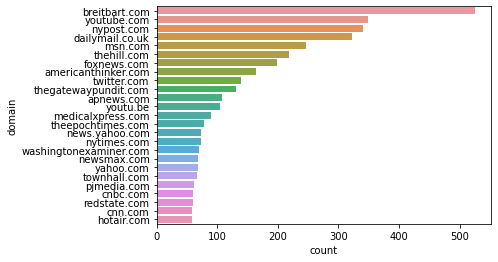

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

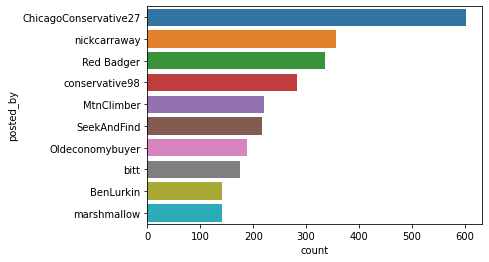

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    MtnClimber               103      1   
                       SeekAndFind               34      1   
                       bitt                       3      1   
apnews.com             SeekAndFind                3      1   
                       Oldeconomybuyer           60      1   
                       Red Badger                 1      1   
                       marshmallow                2      1   
                       nickcarraway               1      1   
breitbart.com          bitt                       3      1   
                       Red Badger                 7      1   
                       marshmallow                3      1   
                       BenLurkin                  1      1   
                       ChicagoConservative27    357      1   
                       conservative98            42      1   
cnbc.com               Oldeconomybuyer            1      1   
                       Red Badger                 1      1   
                       nickcarraway               3      1   
                       BenLurkin                  1      1   
                       ChicagoConservative27      3      1   
cnn.com                bitt                       1      1   
                       Oldeconomybuyer            1      1   
                       nickcarraway               6      1   
                       BenLurkin                 11      1   
                       ChicagoConservative27      6      1   
                       conservative98             1      1   
dailymail.co.uk        bitt                       4      1   
                       Red Badger                 4      1   
                       nickcarraway               2      1   
                       conservative98             1      1   
foxnews.com            MtnClimber                 2      1   
                       bitt                       7      1   
                       Oldeconomybuyer            2      1   
                       nickcarraway               1      1   
                       BenLurkin                  6      1   
                       ChicagoConservative27     20      1   
                       conservative98            31      1   
hotair.com             MtnClimber                 2      1   
                       SeekAndFind               27      1   
                       Red Badger                 1      1   
msn.com                MtnClimber                 1      1   
                       SeekAndFind                8      1   
                       Oldeconomybuyer           11      1   
                       conservative98             1      1   
news.yahoo.com         MtnClimber                 1      1   
                       SeekAndFind                1      1   
                       Oldeconomybuyer            8      1   
                       nickcarraway               3      1   
newsmax.com            bitt                       1      1   
                       BenLurkin                  1      1   
                       conservative98             6      1   
nypost.com             MtnClimber                 2      1   
                       SeekAndFind                1      1   
                       bitt                       9      1   
                       Oldeconomybuyer           11      1   
                       Red Badger                 3      1   
                       nickcarraway              94      1   
                       BenLurkin                  8      1   
                       ChicagoConservative27     43      1   
                       conservative98            36      1   
nytimes.com            bitt                       1      1   
                       conservative98             3      1   
pjmedia.com            SeekAndFind               28      1   
               

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
"Trump calls Desantis ""Desanctimonious""",2022-11-06 02:46:42,262.0
Turn It Down Please: Here Are The Most Annoying Pop Songs Ever Made,2022-10-10 16:35:06,224.0
"[LIVE THREAD] Biden speaks at event in D.C. (""Democracy speech"") - Youtube link",2022-11-03 00:12:09,186.0
"Trump Boasts He’s Polling above ‘Ron DeSanctimonious’ for 2024, at Rally for Oz and Mastriano",2022-11-06 11:02:13,174.0
Power outages from missile attacks in many Ukrainian cities due to major missile attack today,2022-10-10 12:17:24,160.0
"CNN Exclusive: Suspect in Paul Pelosi attack had bag with zip ties, source says",2022-10-30 20:01:08,158.0
Tulsi Gabbard's Dem Decision Fuels Speculation She's Trump's VP Choice,2022-10-16 04:16:19,153.0
NBC News: Third Person Inside House During Attack on Paul Pelosi,2022-10-30 22:10:08,152.0
"Oz vs. Fetterman (Lurch) debate, live thread.",2022-10-26 01:06:17,152.0
